# 🧬 Single-Cell RNA-seq Analysis with Scanpy

This notebook walks through a **complete single-cell RNA-seq (scRNA-seq)** data analysis pipeline using the Python package **Scanpy**.  
It is written for **beginners** in single-cell bioinformatics — especially those coming from a biology background.

We'll go step-by-step through:
1. Loading and preprocessing data  
2. Quality control (QC)  
3. Normalization and feature selection  
4. Dimensionality reduction (PCA, UMAP)  
5. Clustering  
6. Marker gene detection and visualization

By the end of this notebook, you’ll understand not only *how* to perform each step, but also *why* it’s important.

---


### Installation

In [3]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.9 MB/s eta 0:00:00


In [4]:
!pip install anndata

In [5]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 46.2 MB/s eta 0:00:00


In [6]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.8 MB/s eta 0:00:00


In [7]:
!pip install decoupler

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.0 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=b10c0c803a317f1866f8f470638b049590746793c8f17615380754fa3e17da7f
  Stored in directory: /root/.cache/pip/wheels/d6/19/ee/0a6a1793d91c449563b49ccab57ce52da3e6fab7614836bd8c
Successfully built docrep
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [8]:
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 kB 14.4 MB/s eta 0:00:00


### 🧩 Loading Data
In this step, we load the single-cell expression matrix into an **AnnData** object — the core data structure in Scanpy.
It contains:
- `adata.X`: the expression matrix (cells × genes)
- `adata.obs`: metadata for each cell
- `adata.var`: metadata for each gene


In [9]:
#Import core single cell tools

import scanpy as sc
import anndata as ad

In [10]:
!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad

--2025-11-22 19:43:03--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-22 19:43:03--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  47.7MB/s    in 7.1s    

2025-11-22 19:43:11 (47.3 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/35450

In [11]:
fresh_blood_adata = sc.read('bone_marrow.h5ad')

In [12]:
print(fresh_blood_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [13]:
# the dimensions of our dataset
fresh_blood_adata.shape

(14783, 17374)

In [14]:
#14783 cells
#17374 genes

In [15]:
# let's look at the first 5 rows describing the genes in our dataset
fresh_blood_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [16]:
# let's look at the first 5 rows describing the cells (ID) in our dataset
fresh_blood_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [17]:
# How about both. in a proper dataframe format

fresh_blood_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 🧹 Quality Control (QC)
QC ensures we only keep high-quality cells and informative genes.
Typical filters remove:
- Harmonize unique gene names (avoid gene duplications from old pipelines)
- Cells with too few genes (likely dead)
- Cells with too many genes (possible doublets)
- Genes expressed in very few cells (uninformative)


In [18]:
# A useful step for older datasets
fresh_blood_adata.var_names_make_unique()
fresh_blood_adata.obs_names_make_unique()

In [19]:
#Let's search for possible contamination from dying cells, ribosomal transcripts or hemoglobin

#Cells with a high proportion of mitochondrial reads (say >10–20%) are likely stressed, apoptotic, or poorly captured
#Ribosomal transcripts are removed because they represent global transcriptional activity, not cell-type-specific biology
#Instead of true cell populations, high HB signal often represents ambient RNA contamination from lysed red blood cells

fresh_blood_adata.var['MT'] = fresh_blood_adata.var_names.str.startswith("MT-")
fresh_blood_adata.var['RIBO'] = fresh_blood_adata.var_names.str.startswith("RPS", "RPL")
fresh_blood_adata.var['HB'] = fresh_blood_adata.var_names.str.startswith("^HB[^(P)]")

In [20]:
#let's just take a quick look at one of them.

mt_genes = fresh_blood_adata.var[fresh_blood_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [21]:
#calculate the qc metrics

sc.pp.calculate_qc_metrics(
    fresh_blood_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [22]:
#note that it is also included in the headers of obs

fresh_blood_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#and your gene list
fresh_blood_adata.var.head()


,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


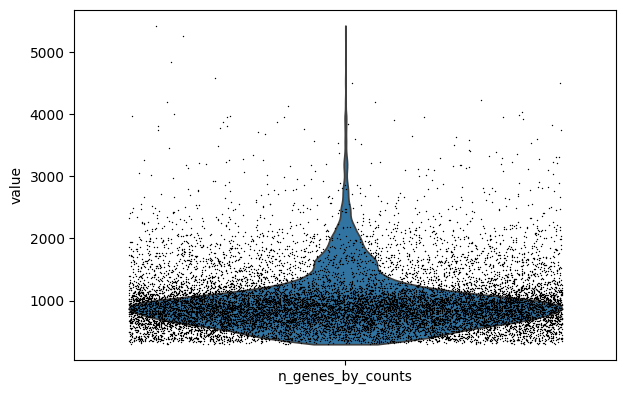

In [24]:
#what is the average number of genes that have at least one detected identifier in each cell.
#in other words, the number of genes expressed in each cell

sc.pl.violin(
    fresh_blood_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

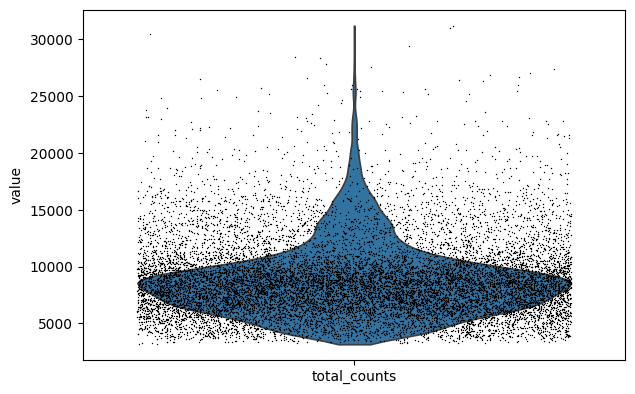

In [25]:
#What is the total number of molecules (UMI) detected in a cell.
#basically you can have 10 UMI molecules but they are all pointing to the same gene.

sc.pl.violin(
    fresh_blood_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

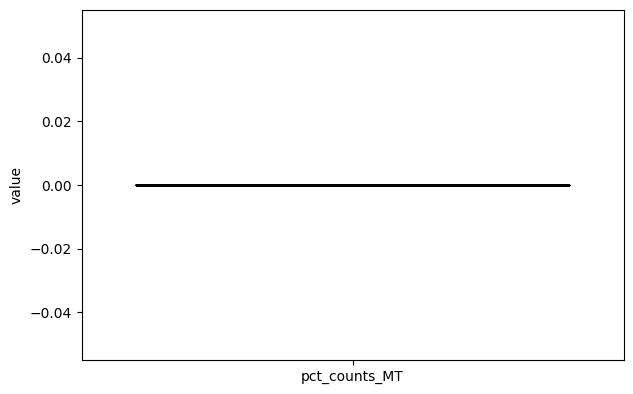

In [26]:
#what about those mitochondrial genes?
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

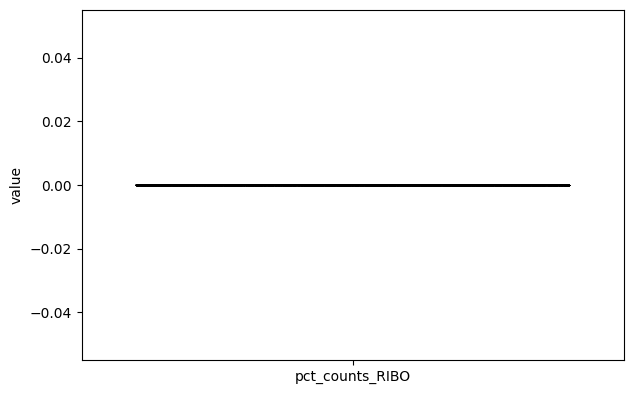

In [27]:
#and the ribosomal genes
sc.pl.violin(
    fresh_blood_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

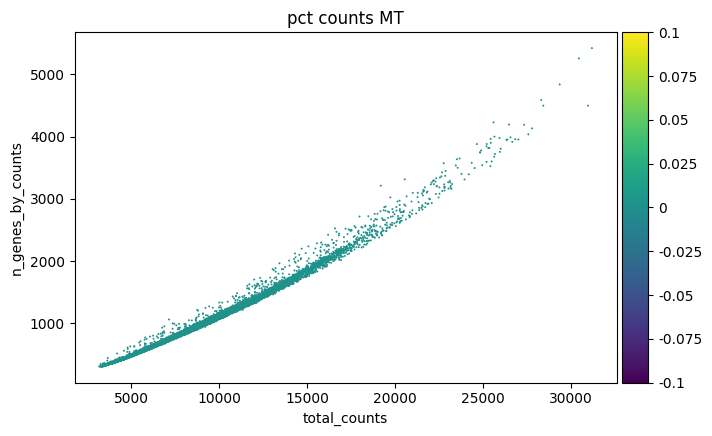

In [28]:
#let's visualize the three of them. And let's see where the mitochondrial genes are
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

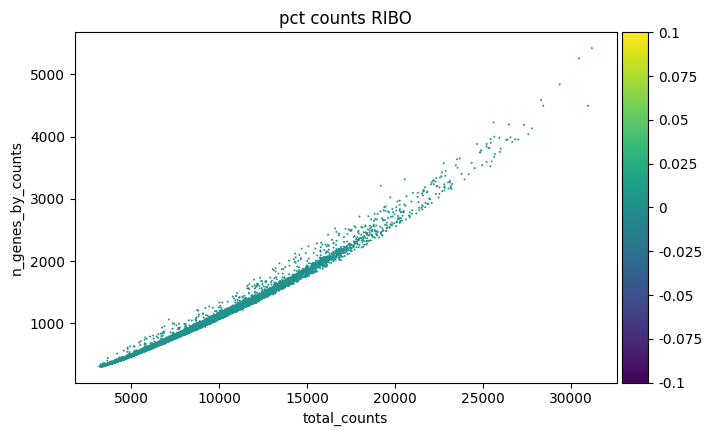

In [29]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

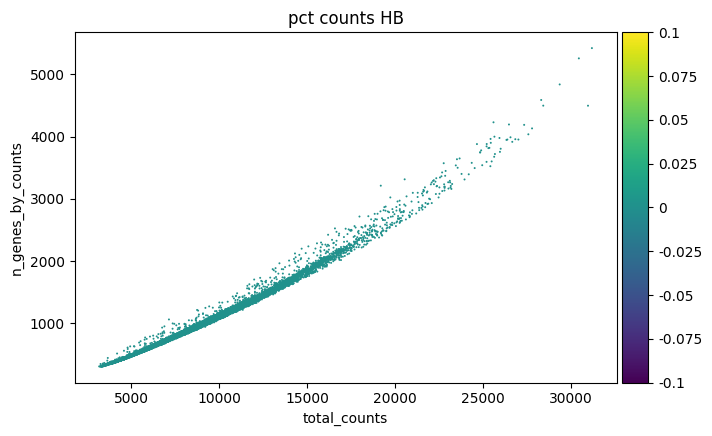

In [30]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_HB")

In [31]:
"""
Additionally, it is important to note that for datasets with multiple batches,
quality control should be performed for each sample individually as quality
control thresholds can vary substantially between batches.
"""

'\nAdditionally, it is important to note that for datasets with multiple batches,\nquality control should be performed for each sample individually as quality\ncontrol thresholds can vary substantially between batches.\n'

In [32]:
#Let's use the data MT plot to select things to remove
#sc.pp.filter_cells(fresh_blood_adata, min_genes=1000)
#sc.pp.filter_genes(fresh_blood_adata, min_cells=1000)

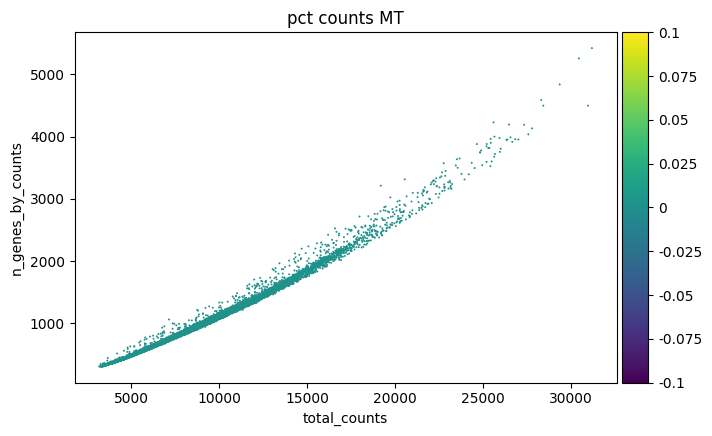

In [33]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

In [34]:
# we can also further filter for ribosomal contaminations using

fresh_blood_adata = fresh_blood_adata[
    fresh_blood_adata.obs['pct_counts_RIBO'] < 10,
    :
]


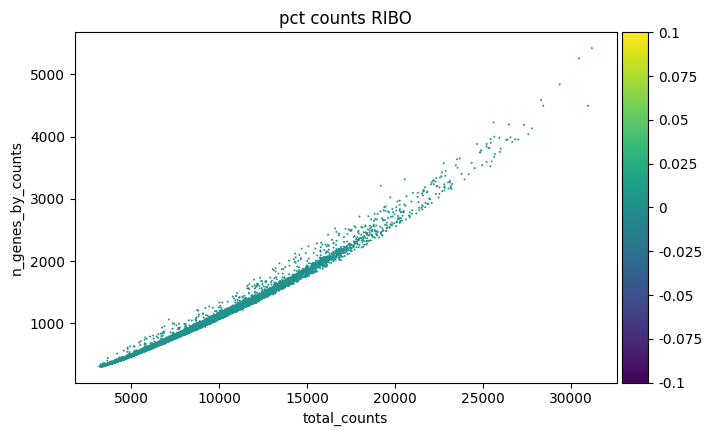

In [35]:
sc.pl.scatter(fresh_blood_adata, "total_counts", "n_genes_by_counts", color="pct_counts_RIBO")

In [36]:
#doublet detection
##Identifying doublets is crucial as they can lead to misclassifications or
##distortions in downstream analysis steps

In [37]:
sc.pp.scrublet(fresh_blood_adata) #if you have multiple batch samples, you can specify it with batch_key="sample"

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


### ⚖️ Normalization
Normalization adjusts for sequencing depth differences between cells.
Here, we scale counts so each cell has the same total expression level.

In [38]:
#Normalization

In [39]:
# Save a copy of the data
fresh_blood_adata.layers["counts"] = fresh_blood_adata.X.copy()

In [78]:
# Normalizing to median total counts
sc.pp.normalize_total(fresh_blood_adata)
# Logarithmize the data
sc.pp.log1p(fresh_blood_adata)

In [41]:
#Feature selection
#selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(fresh_blood_adata, n_top_genes=1000)

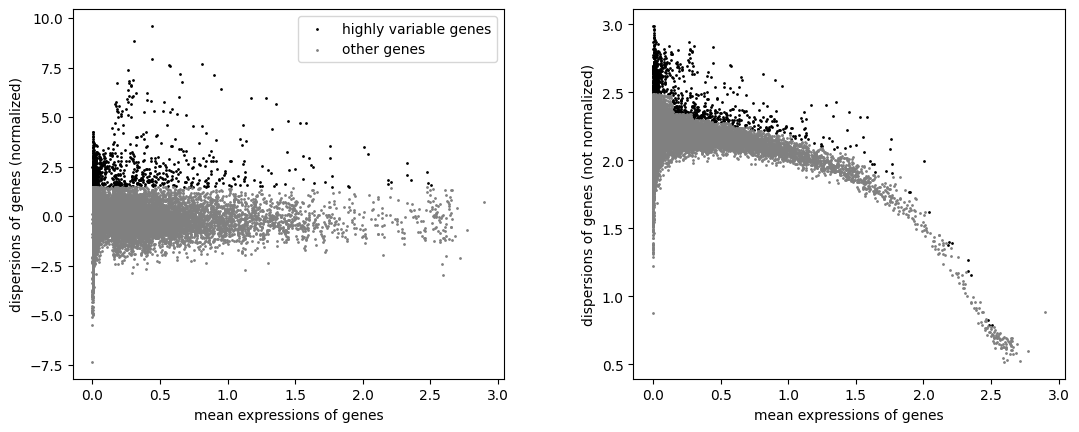

In [42]:
sc.pl.highly_variable_genes(fresh_blood_adata )
#left is normalized
#right is not

### 🔍 Dimensionality Reduction (PCA)
We use **Principal Component Analysis (PCA)** to reduce data complexity and highlight key variation patterns.
This makes later steps like clustering and visualization faster and more robust.

In single-cell RNA-seq, each cell has expression values for thousands of genes, creating a huge, noisy matrix. PCA compresses this high-dimensional data into a smaller set of features (typically 30–50 components) that summarize the key biological and technical variation across cells.

- Noise reduction: scRNA-seq data are sparse and noisy. PCA focuses on the strongest correlated gene expression patterns, discarding random noise.

- Computational efficiency: Downstream analyses like clustering, UMAP, or t-SNE run much faster and more robustly on 30 PCs than on 20,000 genes.

- Signal extraction: The top PCs often correspond to meaningful biological structure—cell type, cell cycle state, or activation level—while later PCs capture less relevant variation.

In [43]:
sc.tl.pca(fresh_blood_adata)

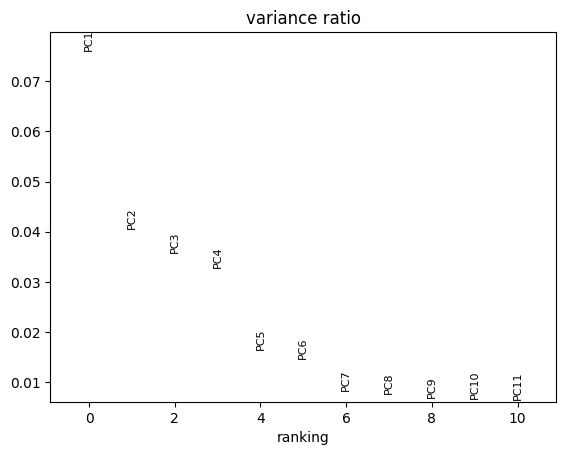

In [44]:
sc.pl.pca_variance_ratio(fresh_blood_adata, n_pcs=10, log=False)

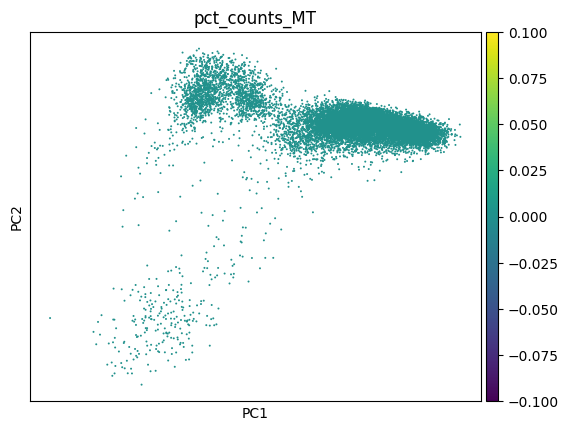

In [45]:
sc.pl.pca(
    fresh_blood_adata,
    color=["pct_counts_MT"]
)

In [46]:
## Nearest Neighbour
# Let us compute the neighborhood graph of cells using the PCA representation of the data matrix.
# basically we want to cluster the PCA components

In [47]:
sc.pp.neighbors(fresh_blood_adata)

In [48]:
sc.tl.umap(fresh_blood_adata)

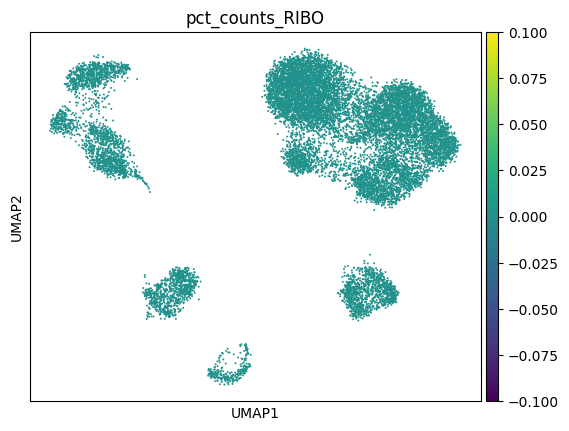

In [49]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

In [50]:
## Clustering by communities.

##Clustering by communities in single-cell RNA-seq is the process of grouping cells that show similar expression profiles — essentially, discovering putative cell types or states.

## Once PCA compresses your data into a manageable set of dimensions, clustering algorithms like Leiden operate on a graph-based representation of cell–cell relationships.

## Usually used for cell type detection

In [51]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2)

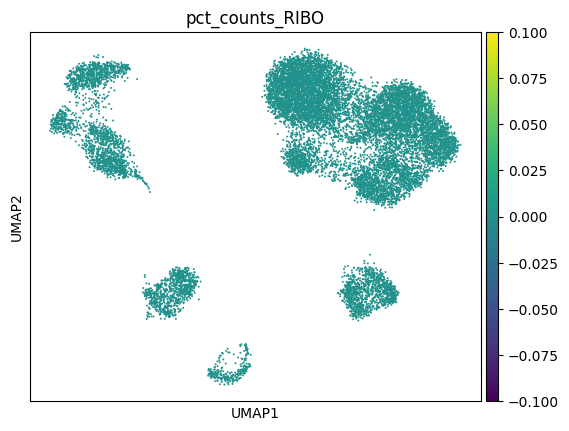

In [52]:
sc.pl.umap(
    fresh_blood_adata,
    color=["pct_counts_RIBO"],
    size=8,
)

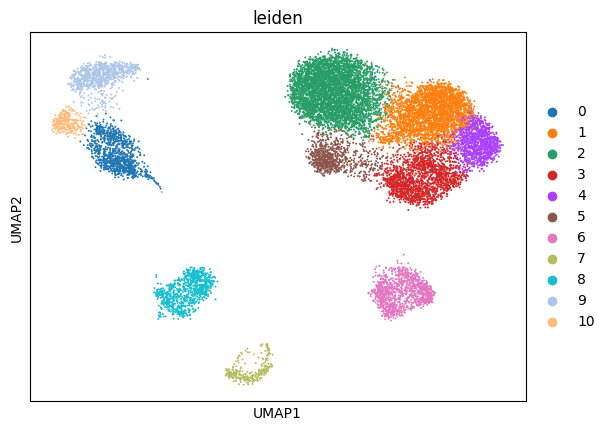

In [53]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden"],
    size=8,
)

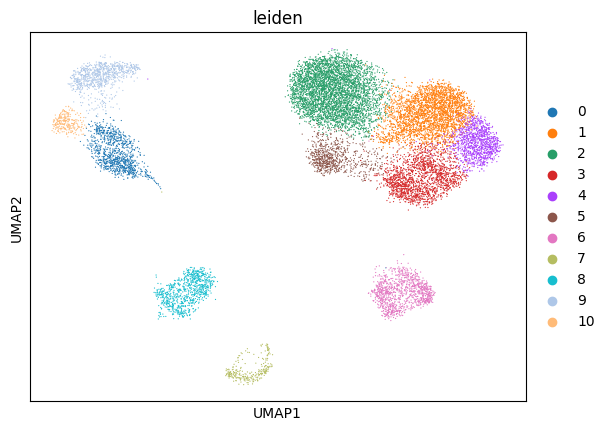

In [54]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

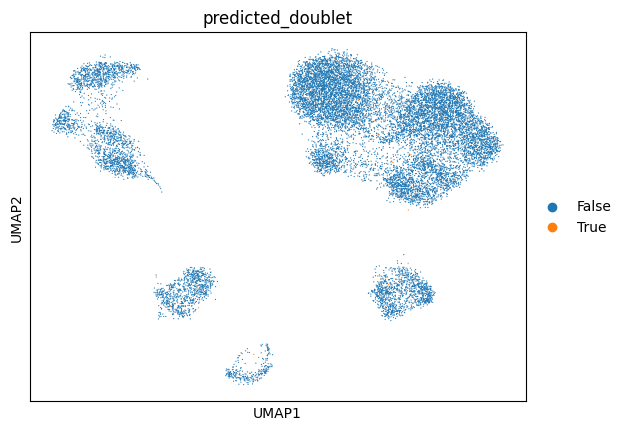

In [55]:
sc.pl.umap(
    fresh_blood_adata,
    color=[ "predicted_doublet"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

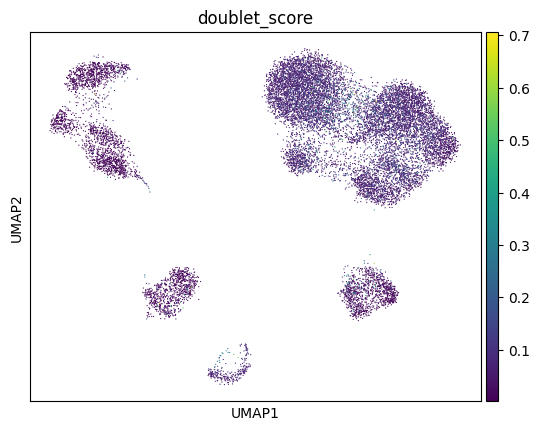

In [56]:
sc.pl.umap(
    fresh_blood_adata,
    color=[ "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
    ncols = 1
)

In [57]:
#Further reclustering

In [58]:
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_02", resolution=0.02)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(fresh_blood_adata, flavor="igraph", n_iterations=2, key_added="leiden_res2", resolution=2)

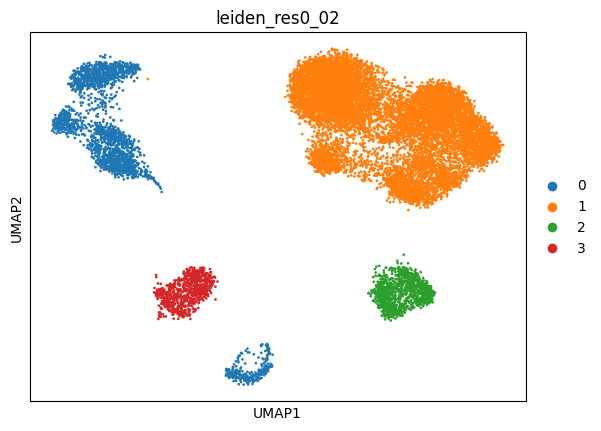

In [59]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_02"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

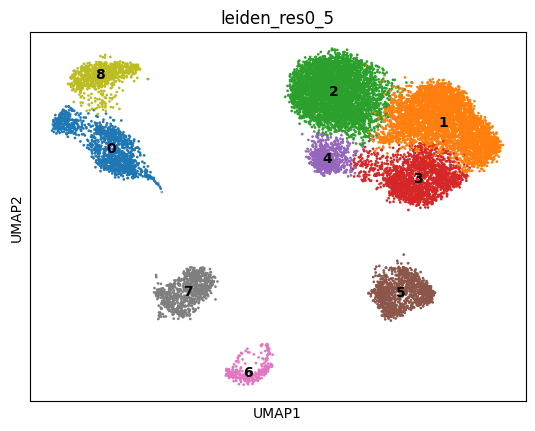

In [60]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res0_5"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

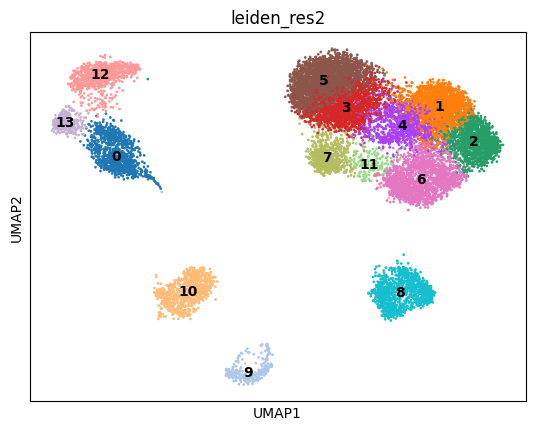

In [61]:
sc.pl.umap(
    fresh_blood_adata,
    color=["leiden_res2"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

### Cell Annotation
Cell annotation is the process of assigning biological meaning—like cell type or functional state—to each cluster found after Leiden clustering.

Traditionally, this relies on manual marker gene inspection: you identify top genes per cluster and match them to known markers. But tools like Decoupler enable a more systematic and data-driven approach.


Decoupler is a framework for gene set activity inference. Instead of labeling clusters by single markers, it estimates the activity of predefined pathways, transcription factors, or cell-type signatures from known databases (e.g., MSigDB, PROGENy, DoRothEA).

In practice:

- You provide your normalized expression matrix (adata).

- You load gene sets representing known biological programs or cell-type signatures.

- Decoupler calculates an activity score per cell or cluster using methods like weighted mean, ULM, or AUCell.

- You interpret those activities to annotate clusters automatically or semi-automatically.

In [62]:
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

--2025-11-22 19:49:32--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-11-22 19:49:32--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [       <=>     

In [63]:
import pandas as pd

ensembl_var = pd.read_csv('/content/result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [64]:
import decoupler as dc

In [117]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [118]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()
markers.head()

,source,target
0,Bergmann glia,ENSG00000175899
1,Mast cells,ENSG00000128274
3,Pinealocytes,ENSG00000129673
4,Astrocytes,ENSG00000129673
5,Sertoli cells,ENSG00000205002


In [67]:
#load the gene expression matrix into dc
dc.mt.ulm(data=fresh_blood_adata,
          net=markers,
          tmin = 3)

In [68]:
#retrieve the score for each cell type

score = dc.pp.get_obsm(fresh_blood_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [69]:
#preview the data
fresh_blood_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883366,0.016440,-0.592726,-0.662709,0.835840,0.855729,0.297566,1.485696,-0.306571,0.237990,...,-0.513300,-0.422886,1.642851,-0.004406,0.544296,0.413771,-0.543441,-0.513300,3.113940,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284214,-0.467915,-0.523161,1.583154,1.219329,0.157764,0.487843,-0.624417,1.770228,...,-0.405214,3.168090,-0.405214,0.462934,0.897830,0.897830,3.848090,-0.405214,-0.202421,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682421,-0.460709,-0.515104,1.573294,1.187902,1.656056,3.930777,1.925992,2.500056,...,-0.398974,1.170355,2.442601,-0.798165,0.925009,-0.651620,1.906375,2.286422,0.851602,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772815,-0.476102,-0.532314,0.269852,1.180849,0.774435,4.512301,1.123891,1.731658,...,-0.412304,0.081099,2.300032,-0.824834,-0.673392,-0.673392,0.929784,-0.412304,1.709482,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643675,-0.510286,-0.332284,-0.371516,-0.621831,1.977723,0.019345,1.642936,2.016226,2.030037,...,-0.287758,2.170472,3.344478,1.184859,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [70]:
fresh_blood_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

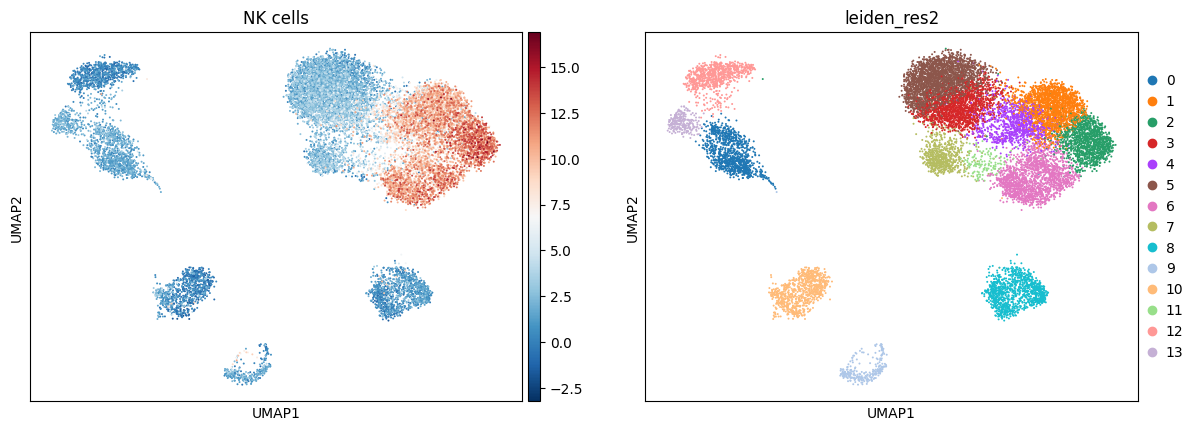

In [108]:
sc.pl.umap(score, color=["NK cells", "leiden_res2"], cmap="RdBu_r")

In [104]:
import seaborn as sns

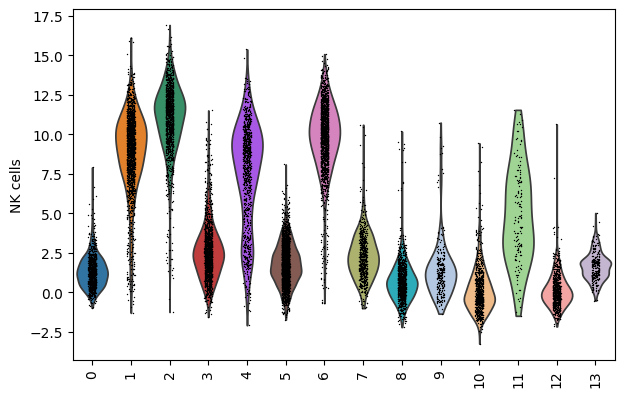

In [109]:
sc.pl.violin(score, keys=["NK cells"], groupby="leiden_res2", rotation=90)

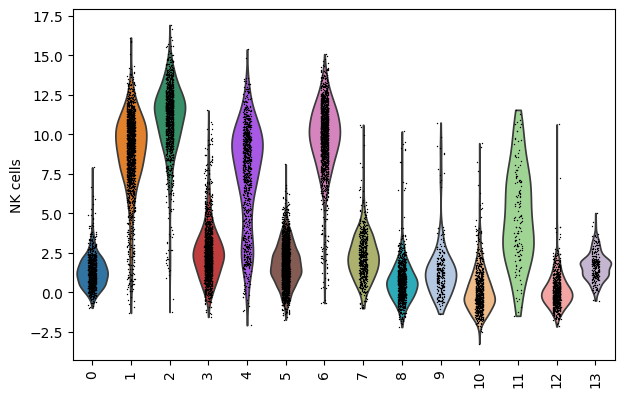

In [110]:
sc.pl.violin(score, keys=["NK cells"], groupby="leiden_res2", rotation=90)

In [ ]:
#. Now let's know what each of the 13 clusters mean

In [93]:
#rank genes
fresh_blood_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res2", reference="rest", method="t-test_overestim_var")
fresh_blood_adata_rank = fresh_blood_adata_rank[fresh_blood_adata_rank["stat"] > 0]
fresh_blood_adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,93.836181,6.334923,0.0,0.0
1,0,rest,Macrophages,82.249316,5.887121,0.0,0.0
2,0,rest,Monocytes,74.354349,5.750819,0.0,0.0
3,0,rest,Dendritic cells,72.317013,5.287419,0.0,0.0
4,0,rest,Microglia,69.909134,4.155611,0.0,0.0


In [94]:
cluster_annotations = fresh_blood_adata_rank[fresh_blood_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-497219688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = fresh_blood_adata_rank[fresh_blood_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [95]:
cluster_annotations

{'0': 'Neutrophils',
 '1': 'NK cells',
 '5': 'Nuocytes',
 '6': 'NK cells',
 '7': 'Nuocytes',
 '8': 'B cells naive',
 '9': 'Platelets',
 '3': 'Nuocytes',
 '4': 'Gamma delta T cells',
 '10': 'Plasma cells',
 '2': 'Gamma delta T cells',
 '11': 'Thymocytes',
 '12': 'Monocytes',
 '13': 'Neutrophils'}

In [96]:
fresh_blood_adata.obs['cell_type'] = fresh_blood_adata.obs['leiden_res2'].map(cluster_annotations)


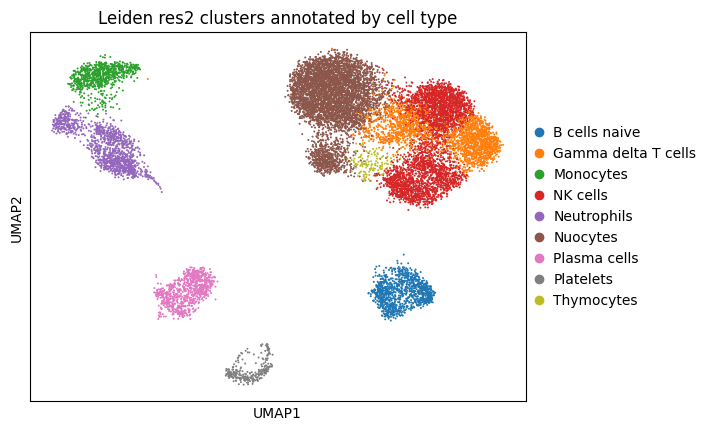

In [98]:
sc.pl.umap(
    fresh_blood_adata,
    color='cell_type',      # color by annotated cell types
    title='Leiden res2 clusters annotated by cell type'
)


In [122]:
# Example of how to subset for multiple genes in the 'source' column
available_genes = set(fresh_blood_adata.var_names)

b_cell_markers = markers[markers['source'].isin(['B cells naive'])]['target']
b_cell_markers = b_cell_markers[b_cell_markers.isin(available_genes)]

nk_cell_markers = markers[markers['source'].isin(['NK cells'])]['target']
nk_cell_markers= nk_cell_markers[nk_cell_markers.isin(available_genes)]

neutrophils_markers = markers[markers['source'].isin(['Neutrophils'])]['target']
neutrophils_markers = neutrophils_markers[neutrophils_markers.isin(available_genes)]

plasma_cells_markers = markers[markers['source'].isin(['Plasma cells'])]['target']
plasma_cells_markers = plasma_cells_markers[plasma_cells_markers.isin(available_genes)]

#display(nk_cell_markers)

### Other ways to visualize the cell types

In [123]:
marker_genes_dict = {
    "B cells": b_cell_markers.head().tolist(),
    "Neutrophils": neutrophils_markers.head().tolist(),
    "NK cells": nk_cell_markers.head().tolist(),
    "Plasma cells": plasma_cells_markers.head().tolist()
    }

categories: B cells naive, Gamma delta T cells, Monocytes, etc.
var_group_labels: B cells, Neutrophils, NK cells, etc.


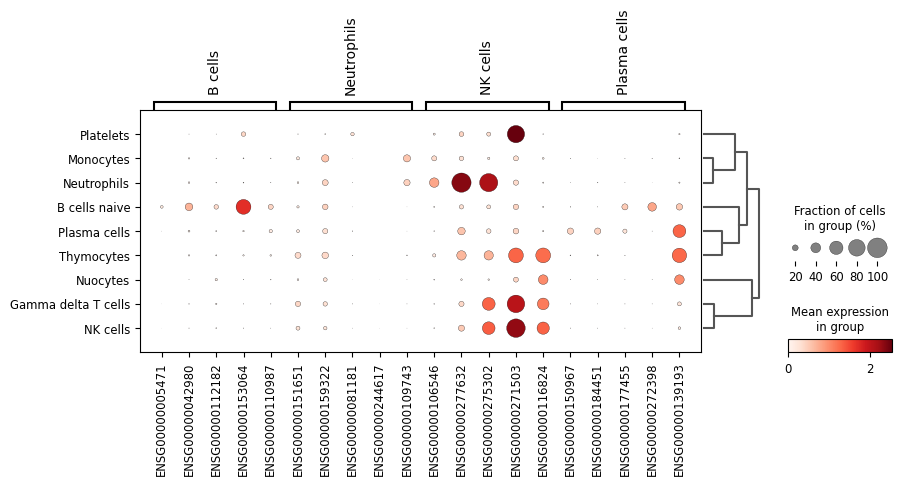

In [124]:
sc.pl.dotplot(fresh_blood_adata,
              marker_genes_dict,
              "cell_type",
              dendrogram=True
              )

categories: 0, 1, 2, etc.
var_group_labels: B cells, Neutrophils, NK cells, etc.


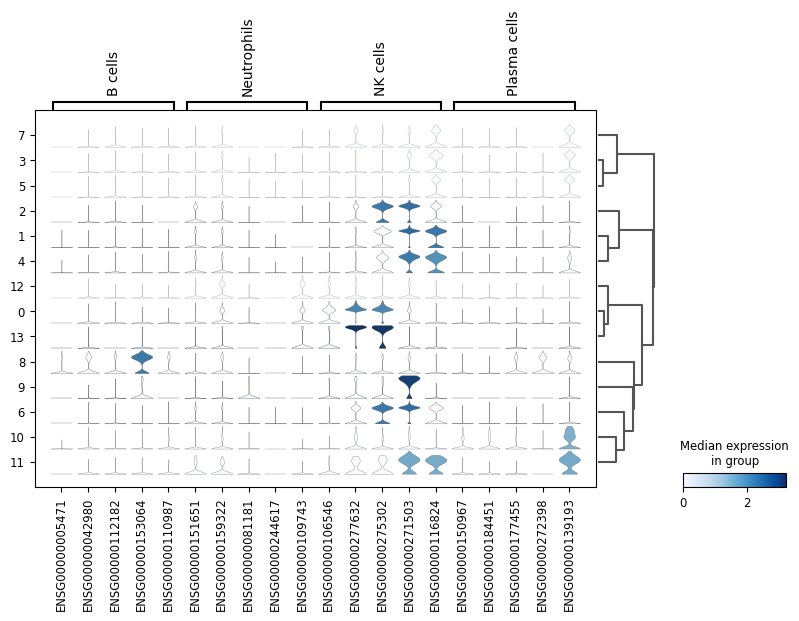

In [125]:
sc.pl.stacked_violin(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res2",  dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, Neutrophils, NK cells, etc.


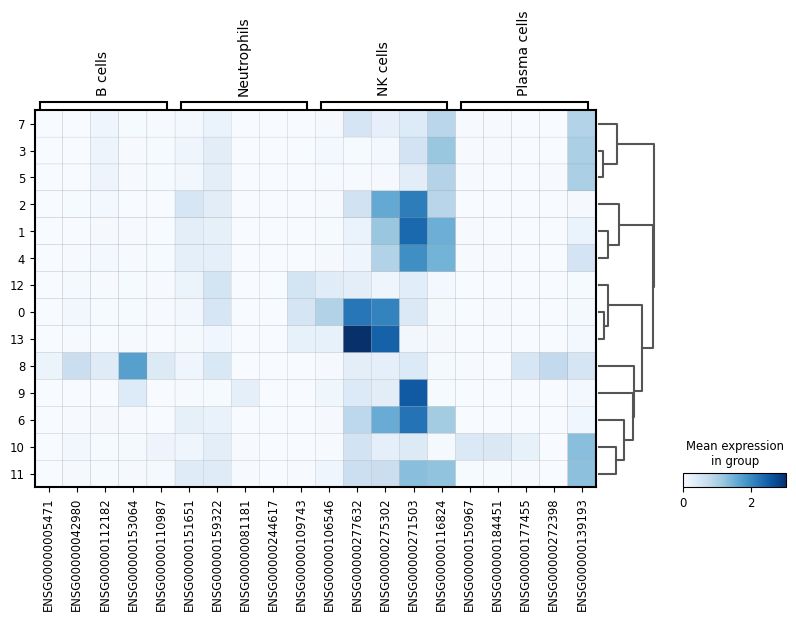

In [127]:
sc.pl.matrixplot(
    fresh_blood_adata,
    marker_genes_dict,
    "leiden_res2",
    dendrogram=True,
    cmap="Blues",
)

categories: 0, 1, 2, etc.
var_group_labels: B cells, Neutrophils, NK cells, etc.


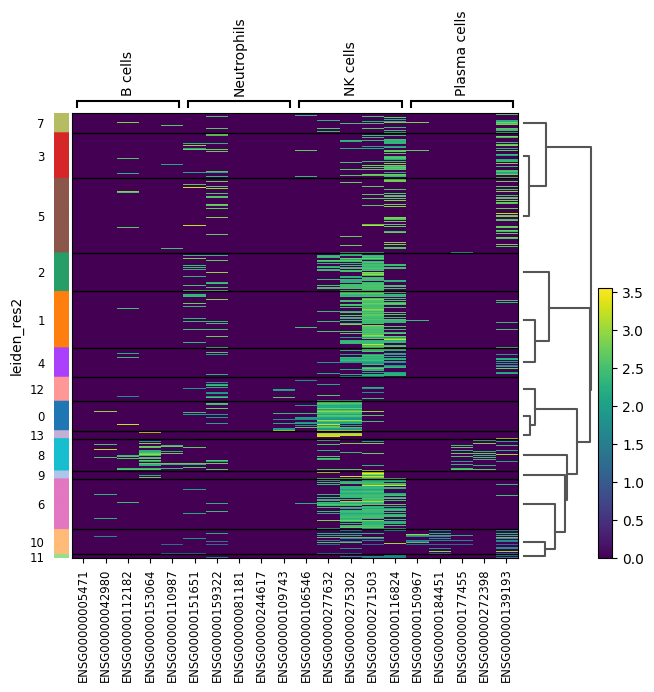

In [129]:
sc.pl.heatmap(
    fresh_blood_adata, marker_genes_dict, groupby="leiden_res2", cmap="viridis", dendrogram=True
)

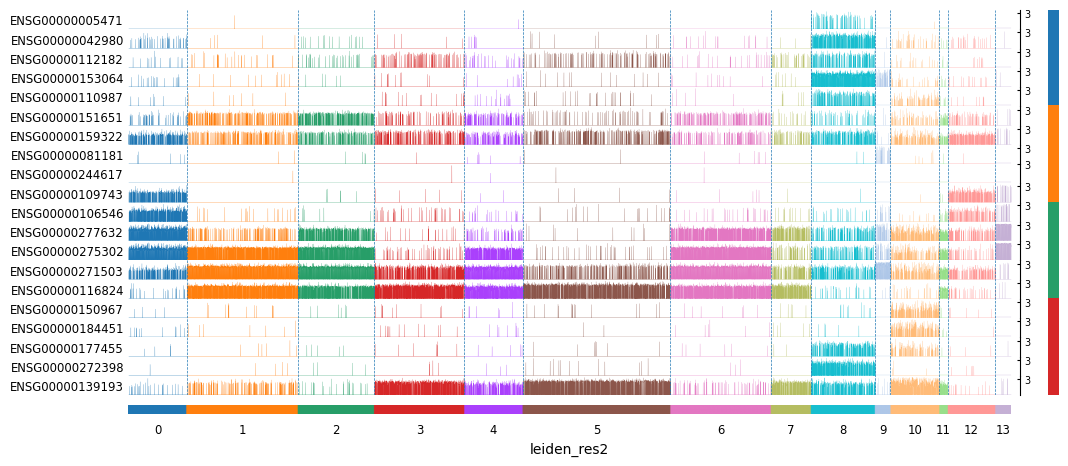

In [131]:
# @title Using genome tracks
sc.pl.tracksplot(fresh_blood_adata, marker_genes_dict, groupby="leiden_res2", dendrogram=False)